# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


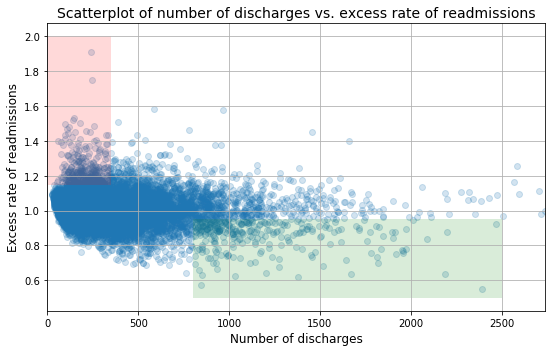

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [5]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [6]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


Number of rows is much less in the new data set.

In [10]:
hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

In [15]:
hospital_read_df.head()
less_than_100_discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
print(less_than_100_discharges['Excess Readmission Ratio'].mean())

1.0226183501683501


#### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the analysis. I have a few reasons for that. 

1. The analysis has been based on graphical analysis of the data only which does not numerically prove corellation. 
2. A number of rows have been dropped in the clean hospital data set. The missing values should either be back filled with data or set to 0 or mean. 
3. The percentage values cannot be trusted because so many rows were dropped. 
4. Additionally, the conclusions are based on hospital capacity which is not present in the data. If an assumption has been made, it has not been mentioned. 
5. The definition of small hospitals (<300) is not clear. Can all hospitals with <300 discharges be considered as small hospitals ? No.

###  Setup appropriate hypothesis test

Null Hypothesis: There is no significant corellation between the number of discharges and readmission rates.
Alternate Hypothesis: There is a statistically significant corellation between number of discharges and readmission rates.



In [16]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


There is a negative corellation between number of discharges and excess readmission ratio. 

### p-value and threshold of alpha = 0.5

In [19]:
import scipy.stats as stats
n1=11497
r1 = -0.097398
t1=(r1*((n1-2)/(1-r1**2))**0.5)
df1=n1-2
p_value1 = stats.t.sf(np.abs(t1), df1)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

The pvalue is <0.05 hence we can reject the null hypothesis. 

### Report statistical significance for $\alpha$ = .01

The statistical significance for $\alpha$=.01 will be the same as when $\alpha$=.05 because p_value will be calculated the same way and assumed $\alpha$ will not be part of p_value calculation.

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client

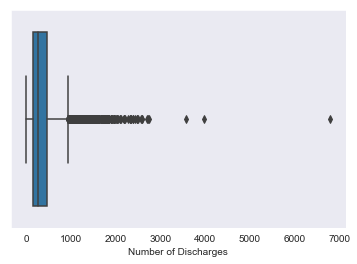

In [22]:
import seaborn as sns
sns.set_style("dark")
ax = sns.boxplot(x=clean_hospital_read_df['Number of Discharges'])

In [23]:
#Hospitals with discharge greater than 1000
morethan1k=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
excessReaddmissionRation_0 = morethan1k[morethan1k['Excess Readmission Ratio']<=1]
excessReaddmissionRation_1 = morethan1k[morethan1k['Excess Readmission Ratio']>1]

#Same calculations out of total
excessReaddmissionRatioOverall_0 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']<=1]
excessReaddmissionRatioOverall_1 = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio']>1]

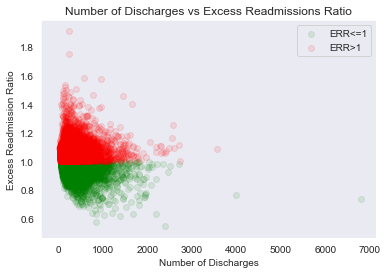

In [24]:
#New Scatter Plot
plt.scatter(excessReaddmissionRatioOverall_0['Number of Discharges'], excessReaddmissionRatioOverall_0['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(excessReaddmissionRatioOverall_1['Number of Discharges'], excessReaddmissionRatioOverall_1['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

Practically, only 1% of the variability in the excess readmission rate can be explained by the number of discharges. 
Statistically, the corellation is significant enough. 

Since the data set is a large one (more than 11000 rows), statistical significance is important because it will be more than 100 hospitals and these hospitals could be of any size.

From the box plot we notice that there are hospitals which have a high discharge rate and a high discharge rate and low excess readmission rate. Similar can be observed with hospitals with ERR>1. The line passes basically straight through the middle suggesting a flat trend.

Existing Recommendation and my comments:-

Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

This should be done only if beneficial to the hospital. Moreover, smaller hospitals should not be closed as they could very well be in remote areas where they may not have enough resources or funds or services but medical services are vital non the less. They could also be in areas where insurance is not readily available.


